In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

print("Done!")

Done!


In [2]:
df_IPC = pd.read_csv(r"IPC.csv")

df_IPC.rename(columns = {"COSTO CANASTA BÁSICA (dólares)": "COSTO", "INGRESO FAMILIAR MENSUAL*** (dólares)": "INGRESO",
                         "RESTRICCIÓN / EXCEDENTE EN EL CONSUMO (costo-ingreso) (dólares)": "R/E",
                          "RESTRICCIÓN / EXCENDENTE (porcentual)": "R/E (PORCENTUAL)"}, inplace = True)
df_IPC.fillna(value="", axis = 1, inplace = True)

df_IPC.head(25)

,GOBIERNOS,MESES,AÑOS,COSTO,INGRESO,R/E,R/E (PORCENTUAL)
0,,,,,,,
1,Roldós-Hurtado,Noviembre,1982.0,401.57,401.58,-0.02,0.00%
2,,Julio,1983.0,358.84,301.57,57.28,16.00%
3,León Febres Cordero,Enero,1984.0,197.3,174.36,22.94,11.60%
4,,Marzo,1985.0,189.9,172.36,17.54,9.20%
5,,Enero,1986.0,203.58,186.99,16.59,8.10%
6,,Agosto,1986.0,183.53,170.32,13.21,7.20%
7,,Julio,1987.0,195.4,170.63,24.77,12.70%
8,,Junio,1988.0,128.26,91.12,37.14,29.00%
9,Rodrigo Borja,Septiembre,1988.0,135.56,91.04,44.52,32.80%


In [3]:
df_final = df_IPC.drop(["GOBIERNOS", "MESES", "R/E (PORCENTUAL)"], axis = 1)
for x in range(12):
    df_final.drop(x, axis=0, inplace = True)
df_final.set_index("AÑOS", inplace = True)
df_final

,COSTO,INGRESO,R/E
AÑOS,,,
1990.0,200.61,94.41,106.2
1990.0,205.12,93.32,111.8
1990.0,209.62,92.93,116.69
1991.0,206.8,100.78,106.01
1991.0,205.9,118.17,87.73
...,...,...,...
2023.0,767.31,840.0,-72.69
2023.0,766.73,840.0,-73.28
2023.0,772.35,840.0,-67.65


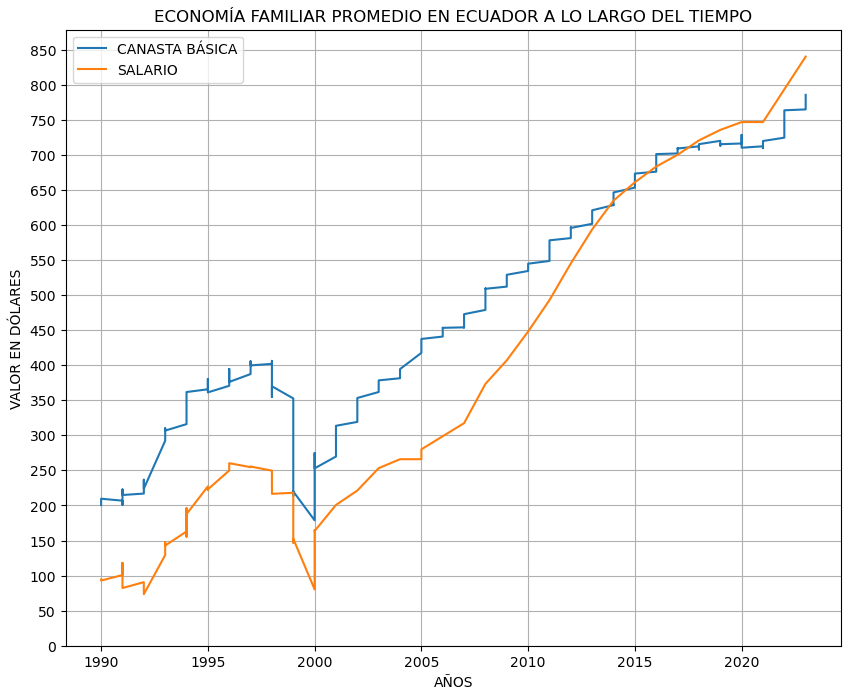

In [4]:
figure(figsize = [10, 8])
plt.plot(df_final[["COSTO", "INGRESO"]], label = ("CANASTA BÁSICA", "SALARIO"))
plt.legend()
plt.grid()

plt.xlabel("AÑOS")
plt.xticks(range(1990, 2023, 5))
plt.ylabel("VALOR EN DÓLARES")
plt.yticks(np.arange(0, 900, 50))
plt.title("ECONOMÍA FAMILIAR PROMEDIO EN ECUADOR A LO LARGO DEL TIEMPO")
plt.show()

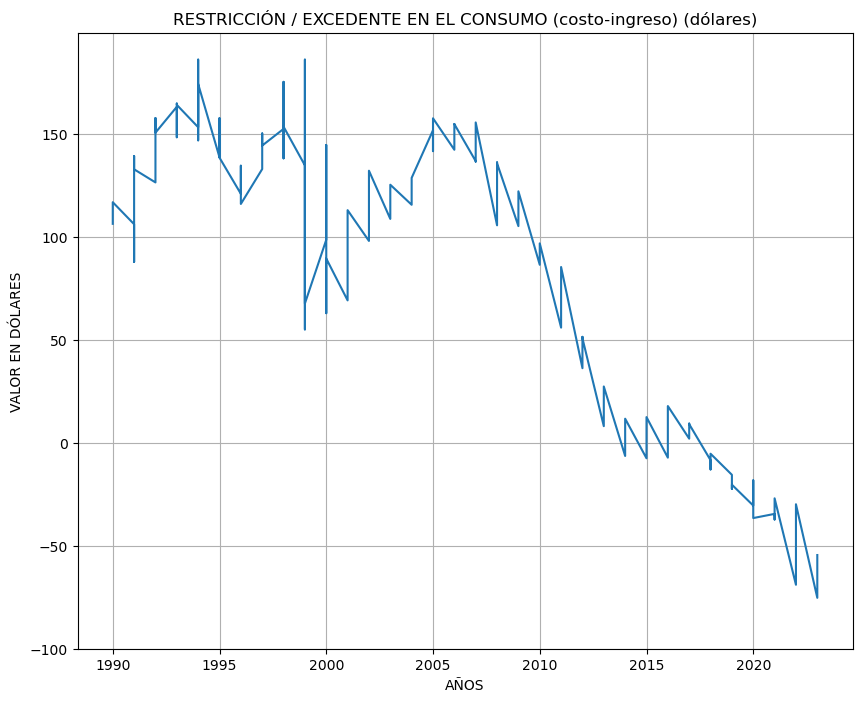

In [5]:
figure(figsize = [10, 8])
plt.plot(df_final["R/E"])
plt.grid()

plt.xlabel("AÑOS")
plt.xticks(range(1990, 2023, 5))
plt.ylabel("VALOR EN DÓLARES")
plt.yticks(np.arange(-100, 200, 50))
plt.title("RESTRICCIÓN / EXCEDENTE EN EL CONSUMO (costo-ingreso) (dólares)")
plt.show()

In [6]:
df_final2 = df_final.reset_index()
df_final2.head(5)

,AÑOS,COSTO,INGRESO,R/E
0,1990.0,200.61,94.41,106.2
1,1990.0,205.12,93.32,111.8
2,1990.0,209.62,92.93,116.69
3,1991.0,206.8,100.78,106.01
4,1991.0,205.9,118.17,87.73


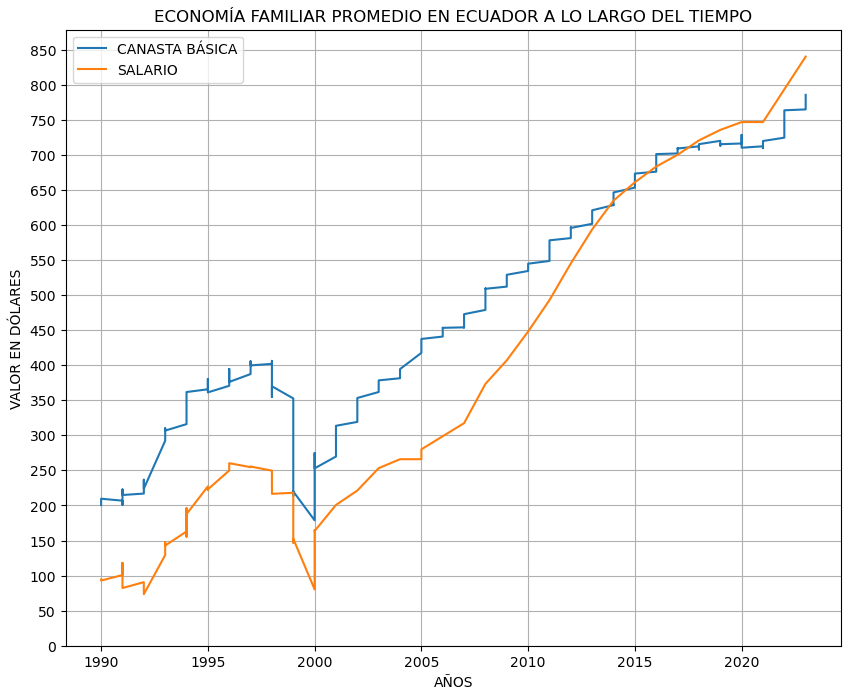

In [7]:
figure(figsize = [10, 8])
plt.plot(df_final2[["AÑOS"]], df_final2[["COSTO", "INGRESO"]] , label = ("CANASTA BÁSICA", "SALARIO"))
plt.legend()
plt.grid()

plt.xlabel("AÑOS")
plt.xticks(range(1990, 2023, 5))
plt.ylabel("VALOR EN DÓLARES")
plt.yticks(range(0, 900, 50))
plt.title("ECONOMÍA FAMILIAR PROMEDIO EN ECUADOR A LO LARGO DEL TIEMPO")
plt.show()


In [8]:
#df_final2["AÑOS"] = df_final2.index
#df_final2 = df_final2.reset_index()
df_final2.shape

(386, 4)

In [9]:
train = df_final2.head(286)
test = df_final2.tail(100)
test

,AÑOS,COSTO,INGRESO,R/E
286,2015.0,665.09,660.8,4.29
287,2015.0,666.92,660.8,6.12
288,2015.0,668.57,660.8,7.77
289,2015.0,668.95,660.8,8.15
290,2015.0,670.53,660.8,9.73
...,...,...,...,...
381,2023.0,767.31,840.0,-72.69
382,2023.0,766.73,840.0,-73.28
383,2023.0,772.35,840.0,-67.65
384,2023.0,779.61,840.0,-60.39


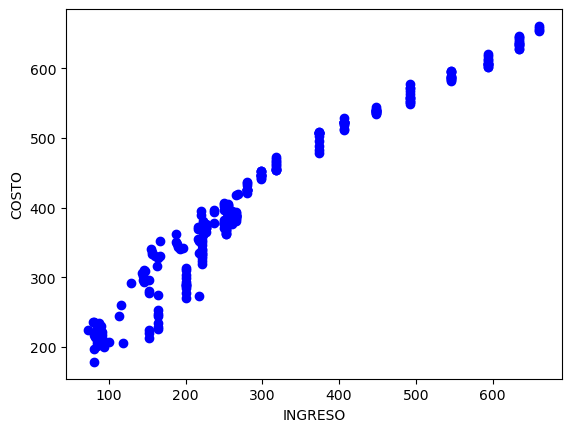

In [11]:
plt.scatter(train.INGRESO, train.COSTO,  color='blue')
plt.xlabel("INGRESO")
plt.ylabel("COSTO")
plt.show()

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["INGRESO", "AÑOS"]])
train_y = np.asanyarray(train[["COSTO"]])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [[0.74605515 0.6739591 ]]


In [15]:
y_hat= regr.predict(test[["INGRESO", "AÑOS"]])
test_x = np.asanyarray(test[["INGRESO", "AÑOS"]])
test_y = np.asanyarray(test[["COSTO"]])
print("Mean Squared Error (MSE) : %.2f" % np.mean((y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Mean Squared Error (MSE) : 1306.73
Variance score: -0.95


C:\Users\Mateo\New folder\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [21]:
x_new = [[875, 2023],
        [900, 2024]]
regr.predict(x_new)

array([[854.30858112],
       [873.6339189 ]])